In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
float64		column 2	2
float64		column 3	2
float64		column 4	1
float64		column 5	2
float64		column 6	1
float64		column 7	3
float64		column 8	1
float64		column 9	3


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,211.000000,212.000000,212.000000,213.000000,212.000000,213.000000,211.000000,213.000000,211.000000
mean,1.518320,13.399764,2.692972,1.445305,72.672689,0.496197,8.940142,0.175869,0.056777
std,0.003004,0.813440,1.436048,0.500412,0.744757,0.653607,1.413160,0.498245,0.097326
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516515,12.897500,2.165000,1.190000,72.310000,0.120000,8.235000,0.000000,0.000000
50%,1.517680,13.295000,3.480000,1.360000,72.800000,0.550000,8.600000,0.000000,0.000000
75%,1.519130,13.815000,3.602500,1.630000,73.092500,0.610000,9.145000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

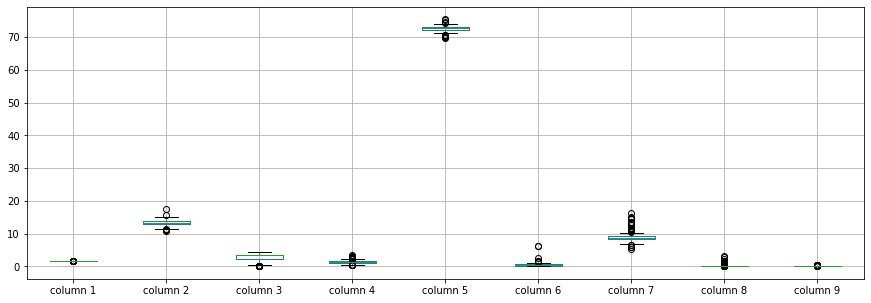

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518320
column 2    13.399764
column 3     2.692972
column 4     1.445305
column 5    72.672689
column 6     0.496197
column 7     8.940142
column 8     0.175869
column 9     0.056777
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.202861,-0.108065,-0.408955,-0.513231,-0.286381,0.799623,0.005096,0.141577
column 2,-0.202861,1.000000,-0.250044,0.152807,-0.007576,-0.261495,-0.279098,0.309986,-0.232289
column 3,-0.108065,-0.250044,1.000000,-0.478767,-0.181632,-0.002556,-0.438443,-0.487913,0.073837
column 4,-0.408955,0.152807,-0.478767,1.000000,0.007806,0.325847,-0.268041,0.478940,-0.067241
column 5,-0.513231,-0.007576,-0.181632,0.007806,1.000000,-0.200782,-0.208278,-0.070940,-0.117887
column 6,-0.286381,-0.261495,-0.002556,0.325847,-0.200782,1.000000,-0.317550,-0.042025,-0.013850
column 7,0.799623,-0.279098,-0.438443,-0.268041,-0.208278,-0.317550,1.000000,-0.110660,0.131673
column 8,0.005096,0.309986,-0.487913,0.478940,-0.070940,-0.042025,-0.110660,1.000000,-0.052494
column 9,0.141577,-0.232289,0.073837,-0.067241,-0.117887,-0.013850,0.131673,-0.052494,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+19,9+19+19,9+19+19+19,9+19+19+19+19,9+19+19+19+19+19,9+19+19+19+19,9+19+19+19,9+19+19,9+19,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 101.4768072275015
Epoch: 1 , loss: 101.47845928485577
Epoch: 2 , loss: 101.43652930626503
Epoch: 3 , loss: 101.46536959134616
Epoch: 4 , loss: 101.37436617337741
Epoch: 5 , loss: 101.43126385028546
Epoch: 6 , loss: 101.39322544978215
Epoch: 7 , loss: 101.42545083852914
Epoch: 8 , loss: 101.39170602651743
Epoch: 9 , loss: 101.44212341308594
Epoch: 10 , loss: 101.30852801983173
Epoch: 11 , loss: 101.34139779897836
Epoch: 12 , loss: 101.3451901949369
Epoch: 13 , loss: 101.41921938382663
Epoch: 14 , loss: 101.30828798734225
Epoch: 15 , loss: 101.68135716364934
Epoch: 16 , loss: 101.34093710092398
Epoch: 17 , loss: 101.34336500901442
Epoch: 18 , loss: 101.39987476055438
Epoch: 19 , loss: 101.28560873178336
Epoch: 20 , loss: 101.36697329007663
Epoch: 21 , loss: 101.35813316932091
Epoch: 22 , loss: 101.38725339449368
Epoch: 23 , loss: 101.34628002460187
Epoch: 24 , loss: 101.37155503493089
Epoch: 25 , loss: 10

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(103.11054633458092, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.09455900949298966

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_NL_1(imp).xlsx", index=False, header=False)